# TP5

exercice 1 :

In [1]:
from skimage import data, io, exposure, filters, util
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [2]:
lena = io.imread('Image/lena.pgm') #image en uint8
print(lena)

[[254 254 254 ... 174 158 127]
 [164 164 164 ... 174 158 127]
 [164 164 164 ... 174 158 127]
 ...
 [ 26  26  38 ...  98  94  86]
 [ 32  32  46 ...  96  96 101]
 [ 32  32  46 ... 167 169 174]]


exo 1:

1)

In [3]:
lena = util.img_as_float(lena) #image normalisée
print(lena)

[[0.99607843 0.99607843 0.99607843 ... 0.68235294 0.61960784 0.49803922]
 [0.64313725 0.64313725 0.64313725 ... 0.68235294 0.61960784 0.49803922]
 [0.64313725 0.64313725 0.64313725 ... 0.68235294 0.61960784 0.49803922]
 ...
 [0.10196078 0.10196078 0.14901961 ... 0.38431373 0.36862745 0.3372549 ]
 [0.1254902  0.1254902  0.18039216 ... 0.37647059 0.37647059 0.39607843]
 [0.1254902  0.1254902  0.18039216 ... 0.65490196 0.6627451  0.68235294]]


2.

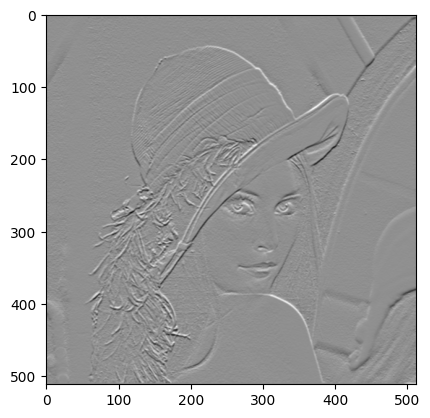

In [4]:
plt.imshow(filters.sobel_h(lena), cmap='gray')
plt.show()

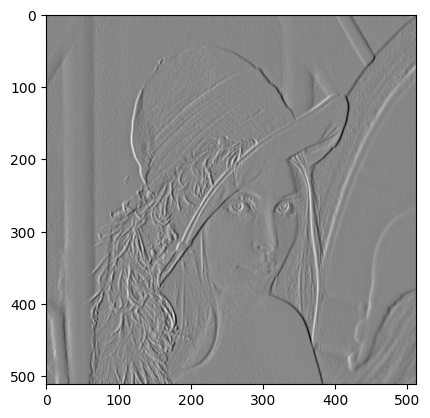

In [5]:
plt.imshow(filters.sobel_v(lena), cmap='gray')
plt.show()

3. & 4.

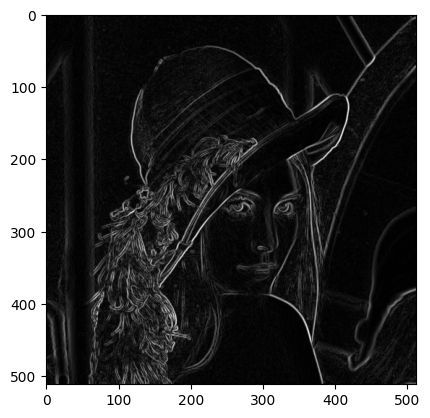

In [6]:
def grad(I):
    sobv = filters.sobel_v(I)
    sobh = filters.sobel_h(I)
    tab = I
    for i in range (len(I)):
        for j in range(len(I[0])):
            tab[i][j]= sqrt(sobv[i][j]**2 + sobh[i][j]**2)
    return tab

lena = util.img_as_float(lena) #image normalisée
lena = grad(lena)
plt.imshow(lena, cmap='gray')
plt.show()

exercice 2 :

1.

(array([[491.,  16.,   3., ...,   0.,   0.,   0.],
        [485.,  21.,   4., ...,   0.,   0.,   0.],
        [478.,  20.,  12., ...,   0.,   0.,   0.],
        ...,
        [472.,  25.,   5., ...,   0.,   0.,   0.],
        [463.,  32.,   6., ...,   0.,   0.,   0.],
        [479.,  19.,   4., ...,   0.,   0.,   0.]]),
 array([0.        , 0.08061244, 0.16122489, 0.24183733, 0.32244977,
        0.40306222, 0.48367466, 0.5642871 , 0.64489955, 0.72551199,
        0.80612443]),
 <a list of 512 BarContainer objects>)

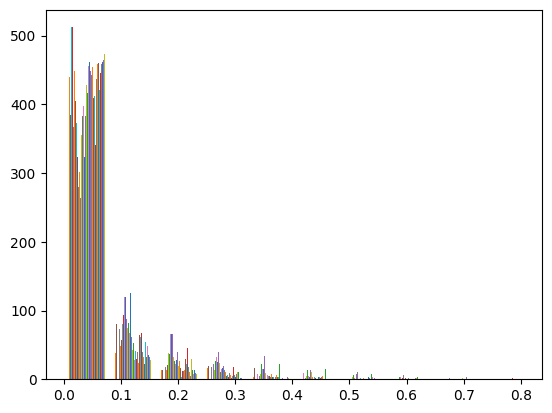

In [7]:
plt.hist(lena)

2. & 3.

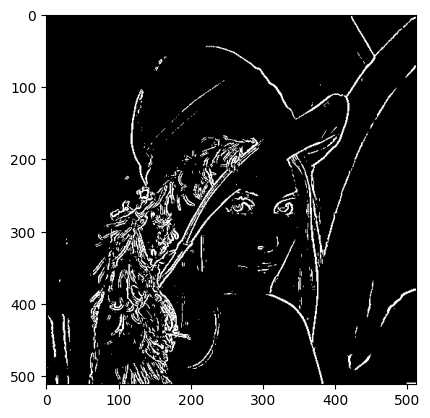

In [8]:
def seuil(I,x):
    tab=I
    for i in range (len(I)):
        for j in range(len(I[0])):
            if(tab[i][j]*255 > x):
                tab[i][j]=1
            else:
                tab[i][j]=0
    return tab

seuil(lena,50)
plt.imshow(lena, cmap='gray')
plt.show()

exercice 3 :

1. & 2. & 3.


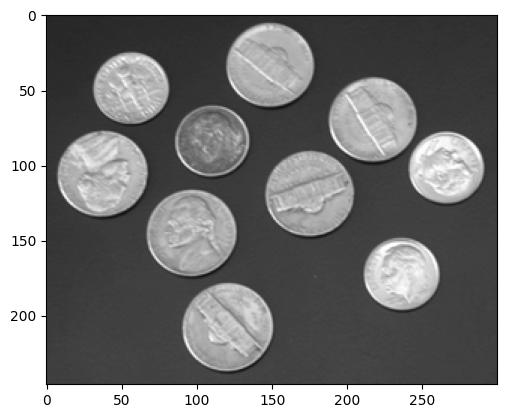

In [9]:
x = io.imread('Image/coins.pgm') #image en uint8
plt.imshow(x, cmap='gray')
plt.show()

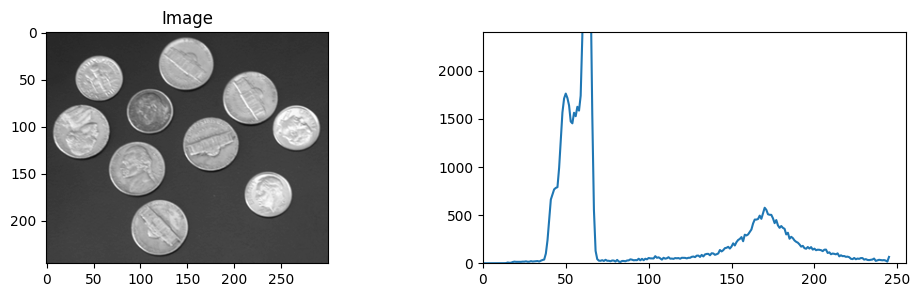

In [10]:
def histGrayScale(img, _xlim=255, _ylim=2400):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])
histGrayScale(x)

25,50 et 160

4. & 5.

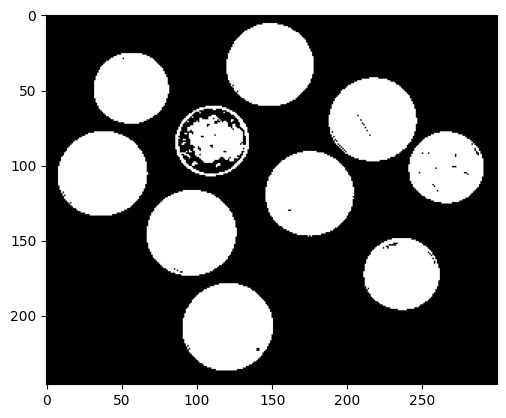

In [11]:
x = io.imread('Image/coins.pgm') #image en uint8
def bin1(X, Tmin, Tmax):
    tab = X
    for i in range(len(X)):
        for j in range(len(X[0])):
            if(X[i][j]<Tmax and X[i][j]>Tmin):
                tab[i][j] = 1
            else:
                tab[i][j] = 0
    return tab

test = bin1(x,120,255)
plt.imshow(test, cmap='gray')
plt.show()

le meilleur resultat et quand tmin = 120 et tmax = 255

6.

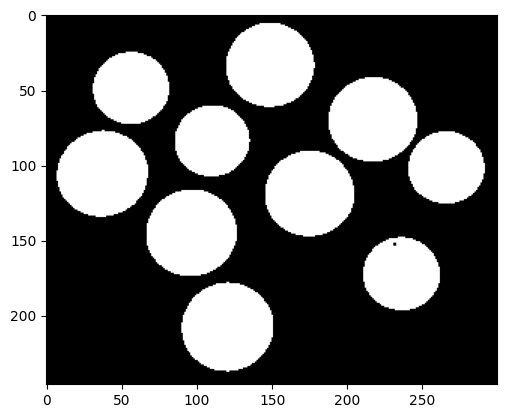

In [12]:
x = io.imread('Image/coins.pgm') #image en uint8
y=filters.median(x)
test = bin1(y,90,255)
plt.imshow(test, cmap='gray')
plt.show()

apres le filtre median le tmin = 90 et tmax = 255

exercice 4:

1. & 2. & 3.

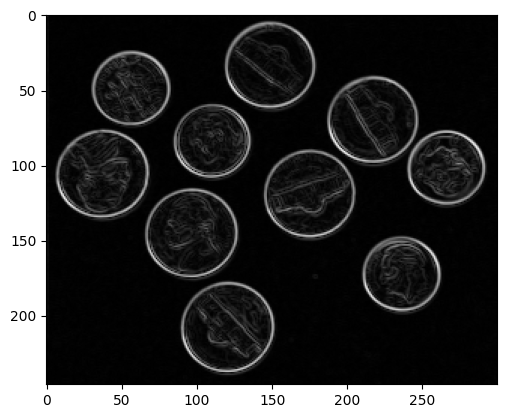

In [13]:
coin = io.imread('Image/coins.pgm') #image en uint8
y = util.img_as_float(coin) #image normalisée
plt.imshow(grad(y), cmap='gray')
plt.show()

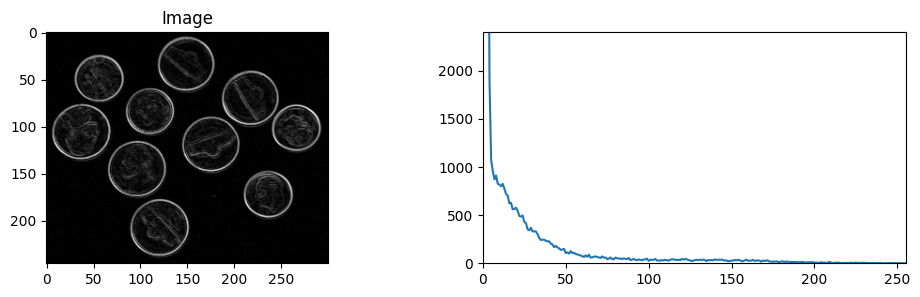

In [14]:
histGrayScale(y)

4.

Text(0.5, 1.0, 'bin1')

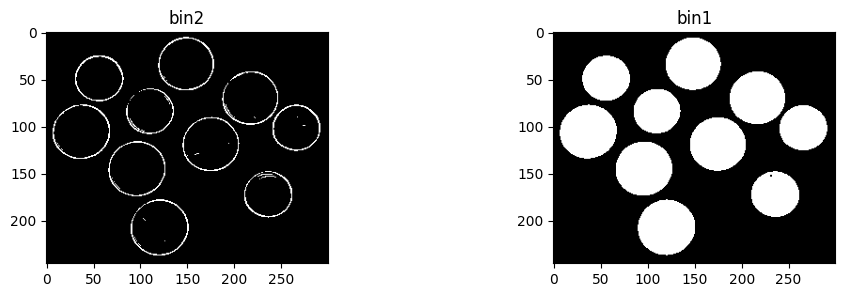

In [16]:
x = io.imread('Image/coins.pgm') #image en uint8
def bin2(y,t):
    tab = y
    for i in range (len(y)):
        for j in range(len(y[0])):
            if(tab[i][j]*255>t):
                tab[i][j] = 1
            else :
                tab[i][j] = 0
    return tab



tab = bin2(y,0.32*255)

_, axes = plt.subplots(ncols=2, figsize=(12, 3))
ax = axes.ravel()
ax[0].imshow(tab, cmap=plt.get_cmap('gray'))
ax[0].set_title('bin2')
ax[1].imshow(test, cmap=plt.get_cmap('gray'))
ax[1].set_title('bin1')


5.

la meilleur valeur de t = 80

exercice 5 :

1.

In [18]:
m = io.imread('Image/coins.pgm') #image en uint8

2.

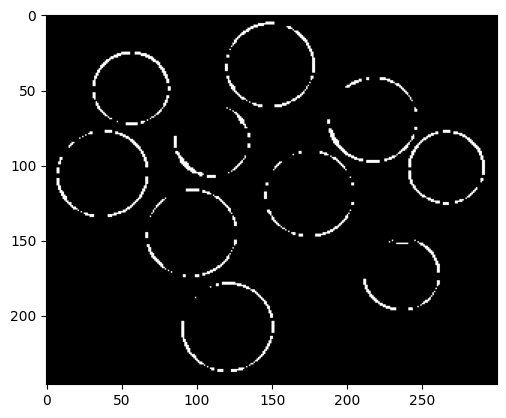

In [19]:
z2 = filters.median(bin1(tab,0,255))
plt.imshow(z2, cmap='gray')
plt.show()

3.

Text(0.5, 1.0, 'z')

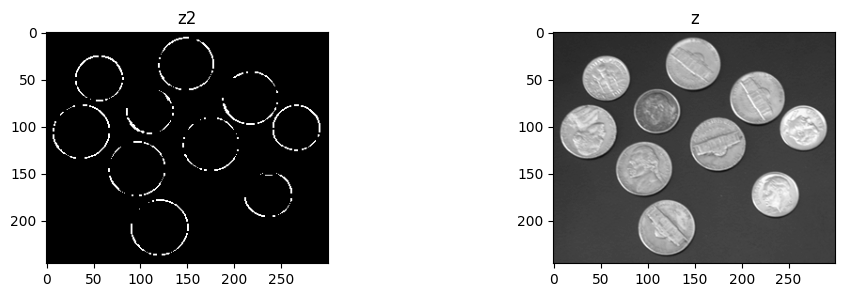

In [20]:
_, axes = plt.subplots(ncols=2, figsize=(12, 3))
ax = axes.ravel()
ax[0].imshow(z2, cmap=plt.get_cmap('gray'))
ax[0].set_title('z2')
ax[1].imshow(m, cmap=plt.get_cmap('gray'))
ax[1].set_title('z')